# Creditworthiness Analysis

### Import necessary libraries

In [215]:
import numpy as np     # numpy for working with arrays or numerical data
import pandas as pd    # pandas used to anlayse data
import matplotlib.pyplot as plt  #matplotlib and seaborn were used for data visualization - graph plotting.
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Read the loan application dataset

In [216]:
df = pd.read_csv("D:/dinsha/++++/data/loan.csv")
df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


### Read the applicant details dataset

In [217]:
applicant = pd.read_csv("D:/dinsha/++++/data/applicant.csv")
applicant.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


### Now we can merge both datasets

In [218]:
data = pd.merge(df,applicant,on='applicant_id')
data

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,...,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,...,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,...,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,...,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,...,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,...,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,d68fbba6-edad-11ea-80fe-30b2f9300e3d,1880194,12,FF&E,1736000,3,real estate,0,0,NaN,...,own,4,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
996,d68fbc28-edad-11ea-bc62-4240ac0824fa,1114064,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,NaN,...,own,4,management / self-employed / highly qualified ...,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0
997,d68fbcaa-edad-11ea-aafc-2de1139e42cd,1758046,12,electronic equipment,804000,4,car or other,0,0,NaN,...,own,4,skilled employee / official,7 years,NaN,NaN,1,Low,NaN,NaN
998,d68fbd2c-edad-11ea-b49e-2894666f2df6,1824545,45,electronic equipment,1845000,4,NaN,0,0,NaN,...,for free,4,skilled employee / official,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0


In [197]:
# to find the number of columns and rows in the data.
data.shape

(1000, 27)

In [198]:
type(data)

pandas.core.frame.DataFrame

# Data Preprocessing

### Checking for null values

In [199]:
data.isnull().sum()

loan_application_id                                           0
applicant_id                                                  0
Months_loan_taken_for                                         0
Purpose                                                      12
Principal_loan_amount                                         0
EMI_rate_in_percentage_of_disposable_income                   0
Property                                                    154
Has_coapplicant                                               0
Has_guarantor                                                 0
Other_EMI_plans                                             814
Number_of_existing_loans_at_this_bank                         0
Loan_history                                                  0
high_risk_applicant                                           0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                          

After checking the null values, its found that the columns 'Telephone', 'Other_EMI_plans', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)', 'Balance_in_existing_bank_account_(upper_limit_of_bucket)', 'Has_been_employed_for_at_most' has many null values. 

### dropping Unwanted columns which has many null values

In [200]:
df = data.drop(['Telephone', 'Other_EMI_plans', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)', 'Balance_in_existing_bank_account_(upper_limit_of_bucket)', 'Has_been_employed_for_at_most'],axis =1)

In [201]:
type(data)

pandas.core.frame.DataFrame

In [202]:
# to get the column names
df.columns

Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
       'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Foreign_worker',
       'Savings_account_balance'],
      dtype='object')

In [203]:
# dropping the rows which has null values.
df1 = df.dropna(subset = ['Property', 'Savings_account_balance', 'Has_been_employed_for_at_least','Purpose'])

In [204]:
df1.isnull().sum()

loan_application_id                            0
applicant_id                                   0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history                                   0
high_risk_applicant                            0
Primary_applicant_age_in_years                 0
Gender                                         0
Marital_status                                 0
Number_of_dependents                           0
Housing                                        0
Years_at_current_residence                     0
Employment_status                              0
Has_been_employed_for_at_least                 0
Foreign_worker      

### Checking for Duplicate values

In [205]:
# Are there any duplicates ?
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


# EDA - Exploratory Data analysis

In [228]:
df1.value_counts('high_risk_applicant')

high_risk_applicant
0    466
1    188
dtype: int64

<AxesSubplot:xlabel='high_risk_applicant', ylabel='count'>

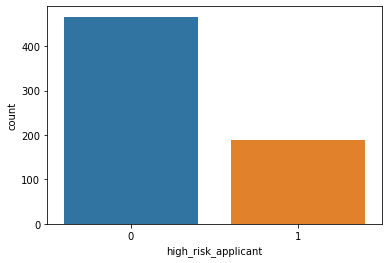

In [226]:
sns.countplot(df1['high_risk_applicant'])

<AxesSubplot:xlabel='Months_loan_taken_for', ylabel='Density'>

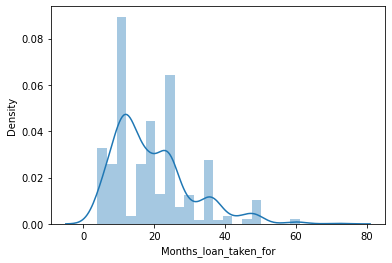

In [206]:
sns.distplot(df1['Months_loan_taken_for'])

### Majority of  loans are taken for a period between 10 to 30 months even though loan for more than 50 months can be considered as a high risk category. 

<AxesSubplot:xlabel='Purpose', ylabel='count'>

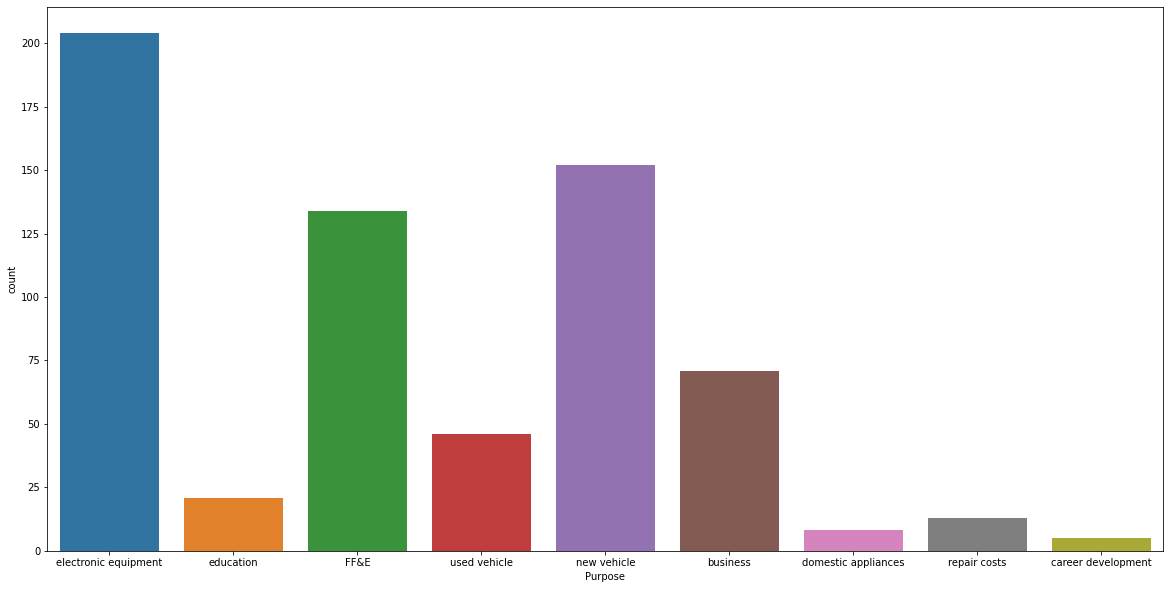

In [225]:
fig = plt.figure(figsize =(20, 10))
sns.countplot(df1['Purpose'])

### Mostly loans are taken for electronic equipment and for new vehicle

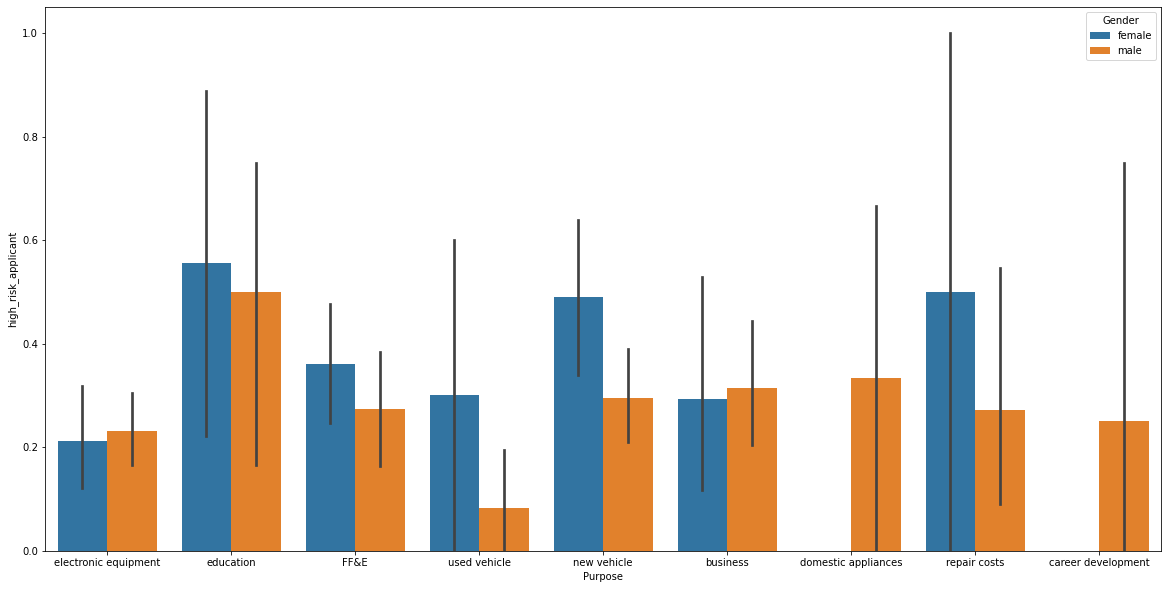

In [208]:
plt.figure(figsize=(20,10))
sns.barplot(df1['Purpose'], df1['high_risk_applicant'], hue = df1['Gender'])
plt.show()

### By checking with high risk applicants, loans taken for education, repair cost and new vehicles are high. Which seems to be a comparatively high risk category. Instead if it's for asset based lending then it will be under less risk category.

In [32]:
df1.value_counts('Employment_status')

Employment_status
skilled employee / official                                         630
unskilled - resident                                                200
management / self-employed / highly qualified employee / officer    148
unemployed / unskilled - non-resident                                22
dtype: int64

### most applicants are employers (earning persons)

<AxesSubplot:xlabel='Employment_status', ylabel='count'>

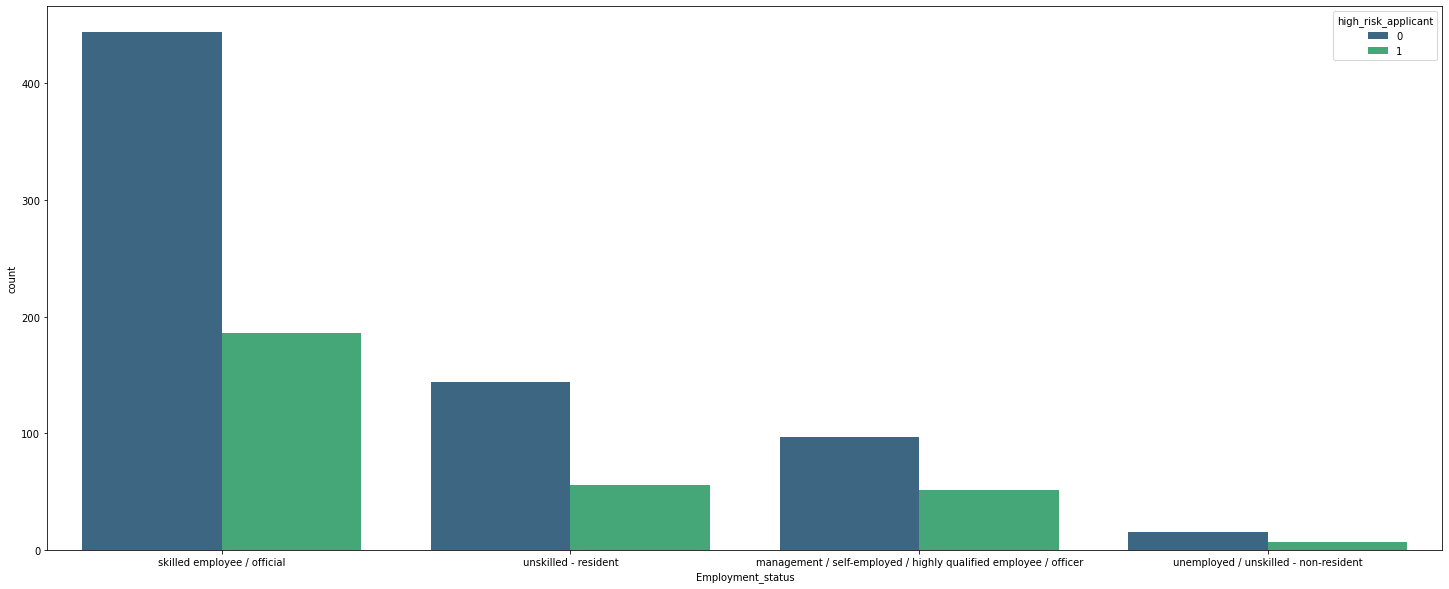

In [31]:
plt.figure(figsize=(25,10))
sns.countplot(x=df1["Employment_status"],hue=df1["high_risk_applicant"],palette="viridis")

<AxesSubplot:xlabel='Loan_history', ylabel='count'>

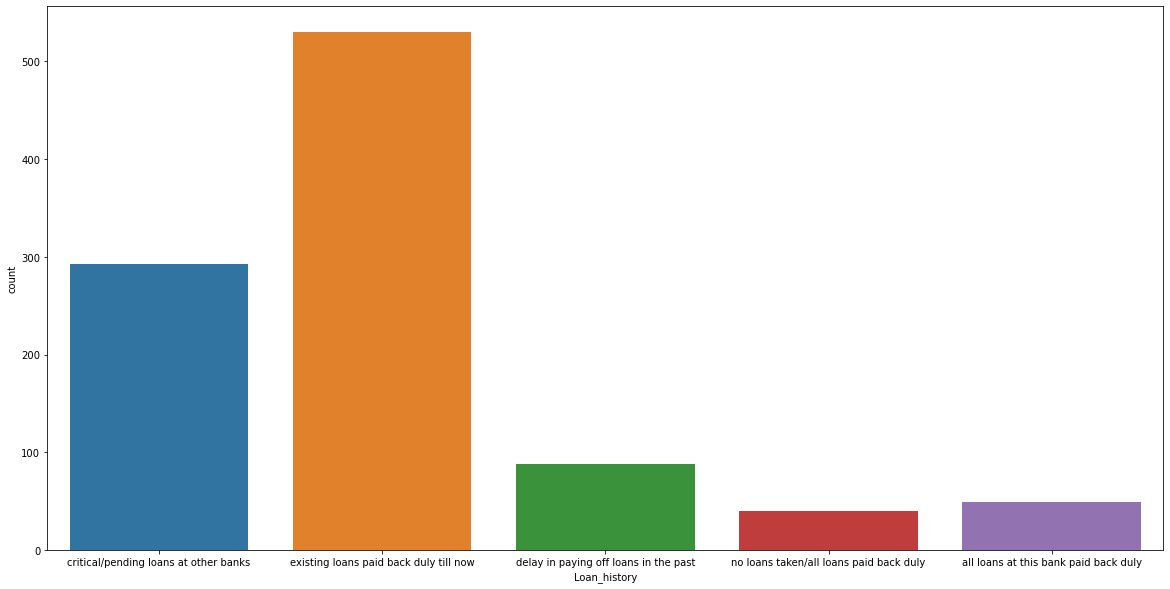

In [17]:
fig = plt.figure(figsize =(20, 10))
sns.countplot(df1['Loan_history'])

### Its found that 2nd most applicants have pending loans in other banks so is high risk.

<AxesSubplot:xlabel='Loan_history', ylabel='count'>

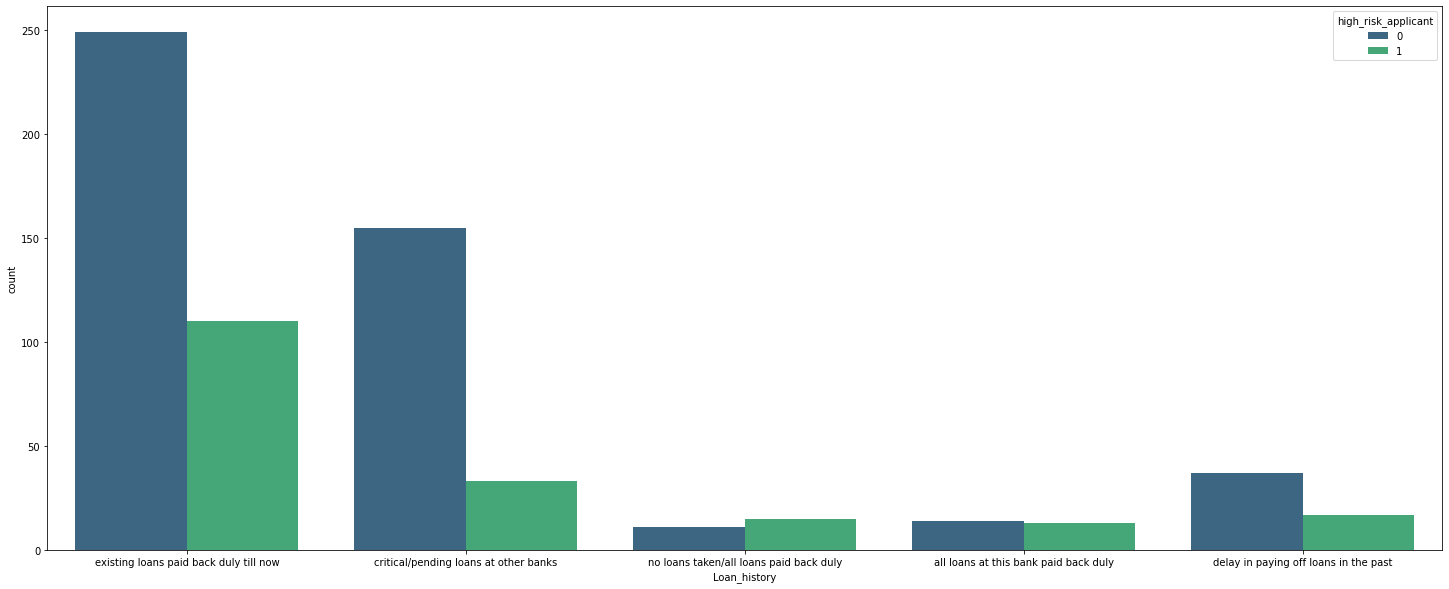

In [232]:
plt.figure(figsize=(25,10))
sns.countplot(x=df1["Loan_history"],hue=df1["high_risk_applicant"],palette="viridis")

<AxesSubplot:xlabel='Number_of_existing_loans_at_this_bank', ylabel='count'>

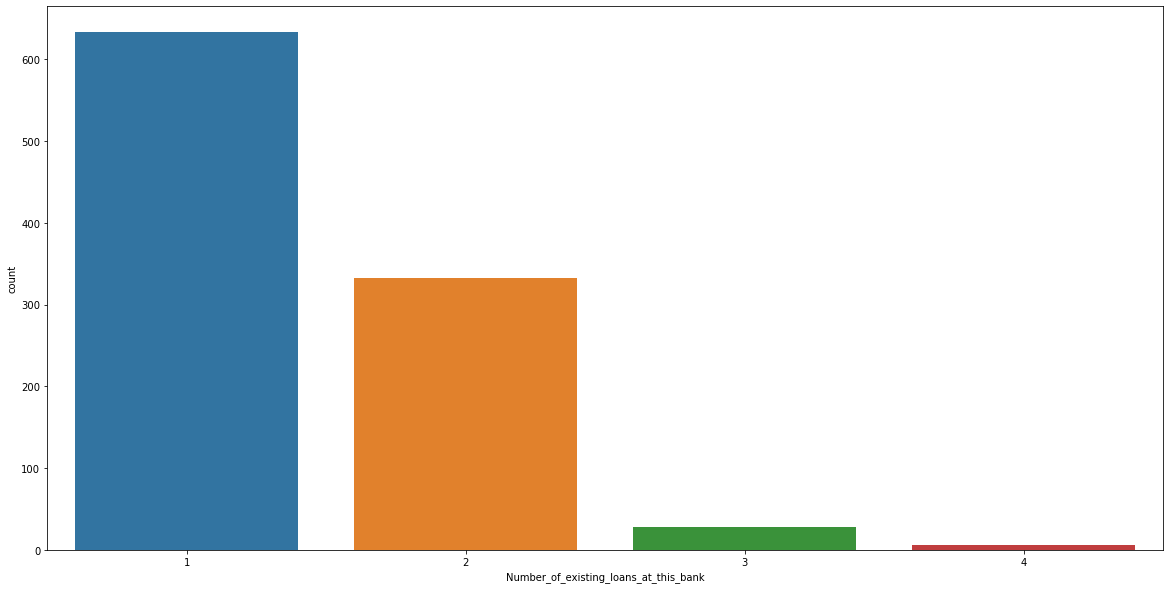

In [36]:
fig = plt.figure(figsize =(20, 10))
sns.countplot(df1['Number_of_existing_loans_at_this_bank'])

### When the number of existing loans increases risk also increases

<AxesSubplot:xlabel='Loan_history', ylabel='count'>

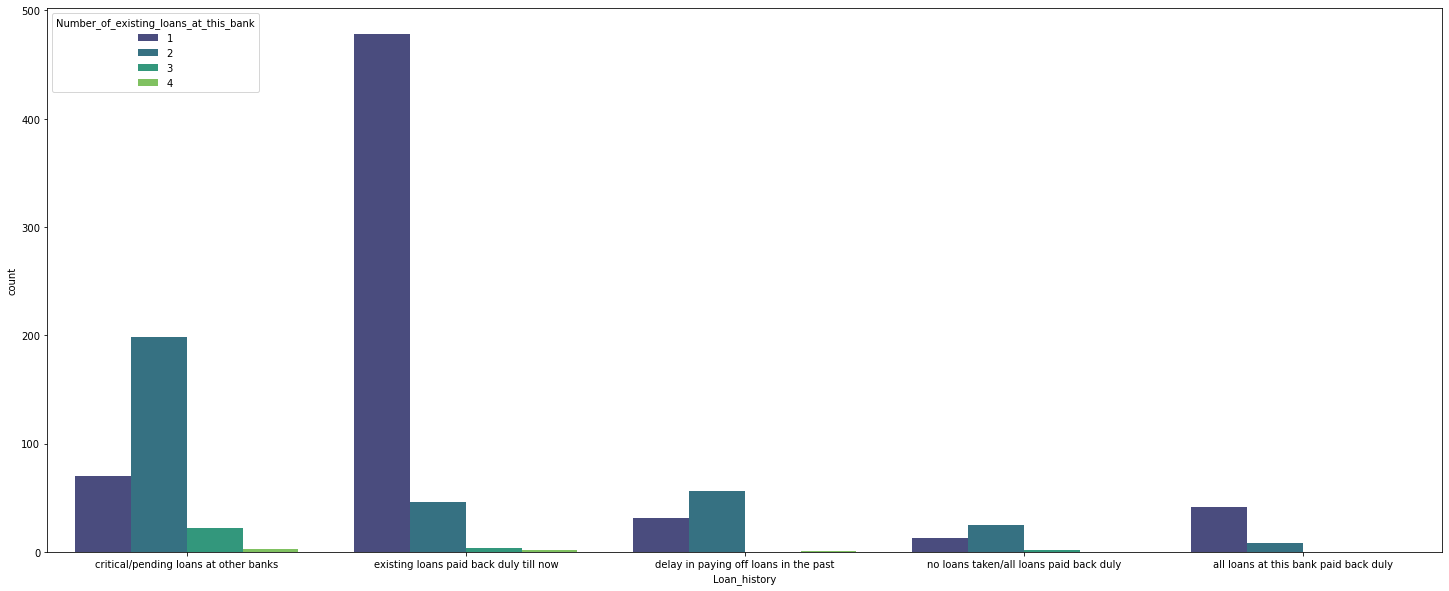

In [35]:
plt.figure(figsize=(25,10))
sns.countplot(x=df1["Loan_history"],hue=df1["Number_of_existing_loans_at_this_bank"],palette="viridis")

<AxesSubplot:xlabel='Savings_account_balance', ylabel='count'>

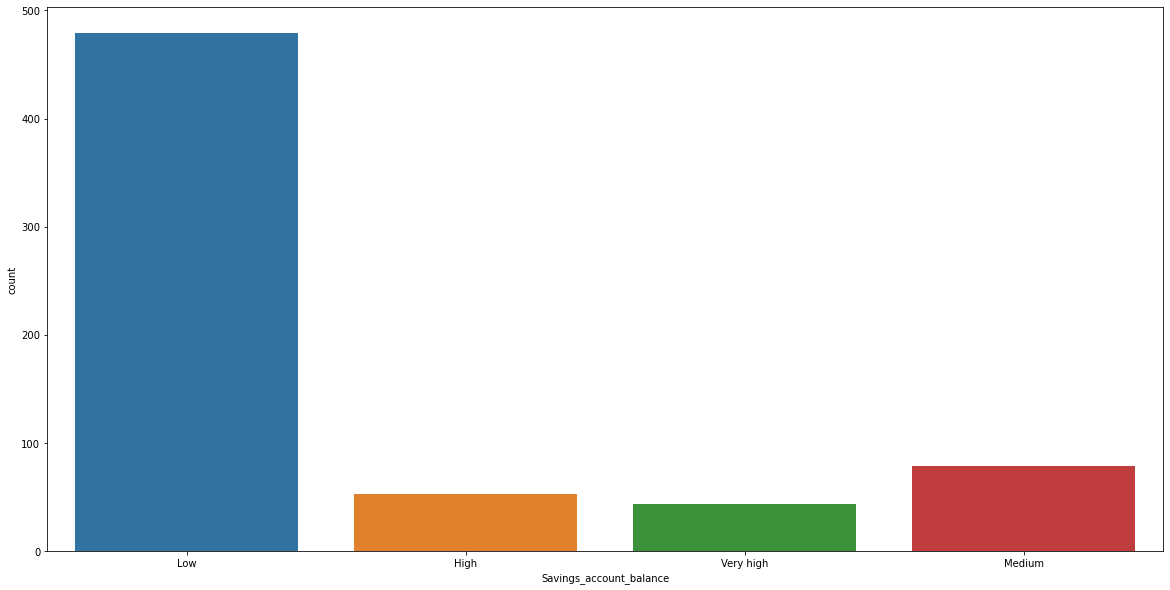

In [236]:
fig = plt.figure(figsize =(20, 10))
sns.countplot(df1['Savings_account_balance'])

### Majority applicants have less savings account balance

<AxesSubplot:xlabel='Savings_account_balance', ylabel='count'>

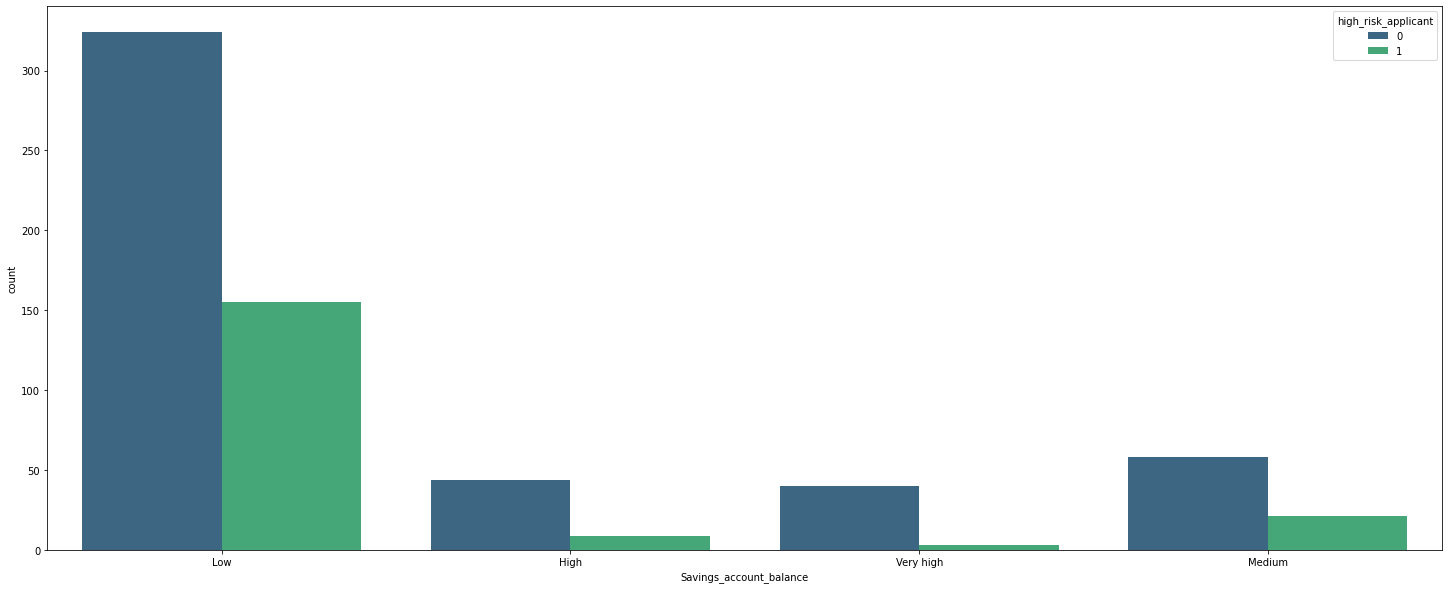

In [238]:
plt.figure(figsize=(25,10))
sns.countplot(x=df1["Savings_account_balance"],hue=df1["high_risk_applicant"], palette="viridis")

<AxesSubplot:xlabel='Has_guarantor', ylabel='count'>

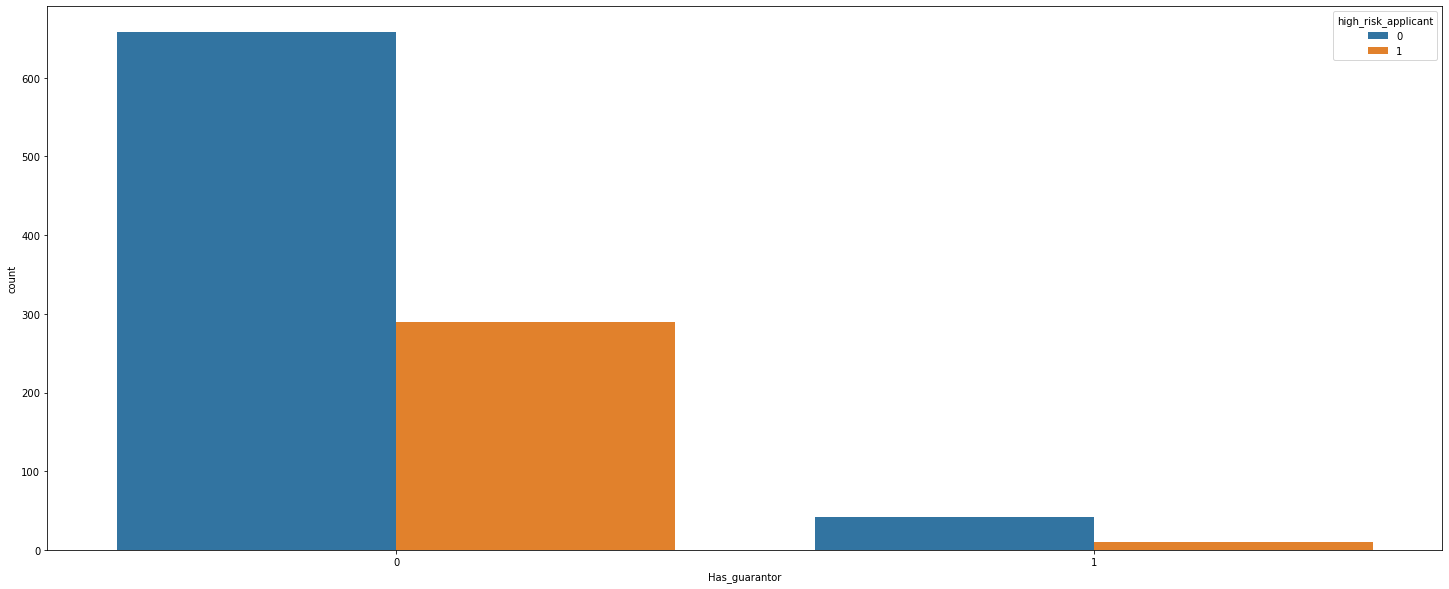

In [40]:
plt.figure(figsize=(25,10))
sns.countplot(x=df1["Has_guarantor"],hue=df1["high_risk_applicant"])

### Most applicants have no guarantor at all,so no guaranty then more risk

<AxesSubplot:xlabel='Housing', ylabel='count'>

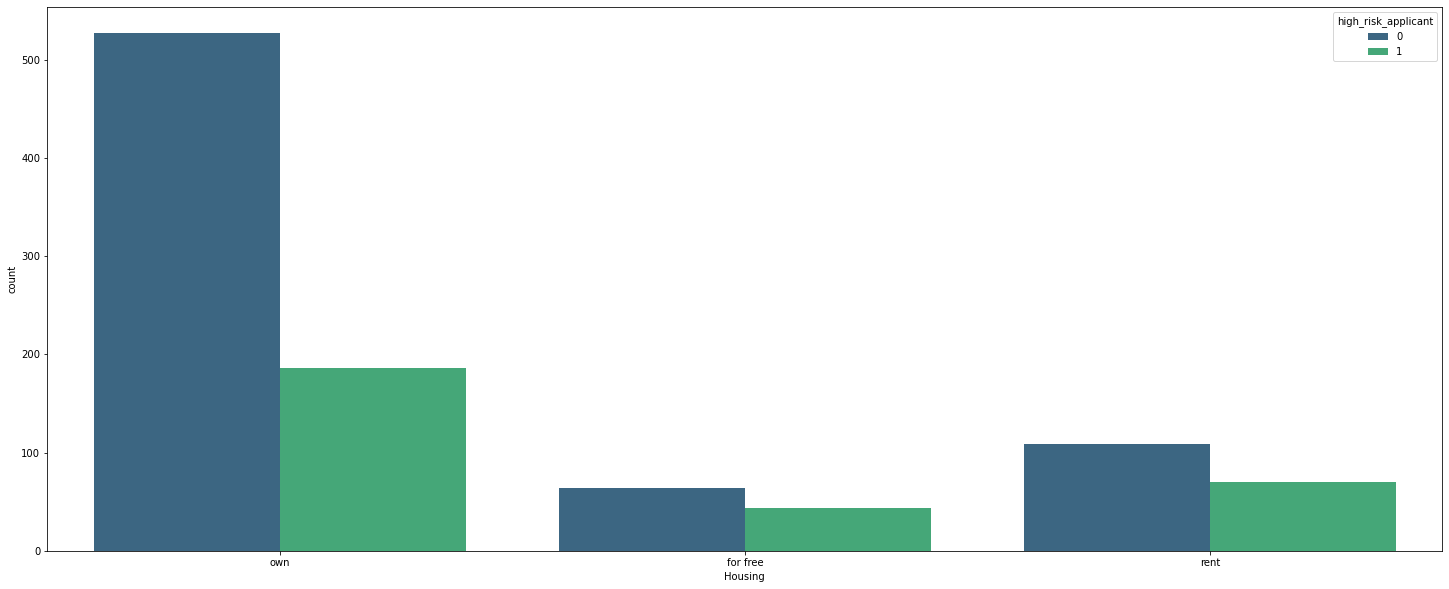

In [33]:

plt.figure(figsize=(25,10))
sns.countplot(x=df1["Housing"],hue=df1["high_risk_applicant"],palette="viridis")

### Most of the applicants have their own housing so risk will be less.

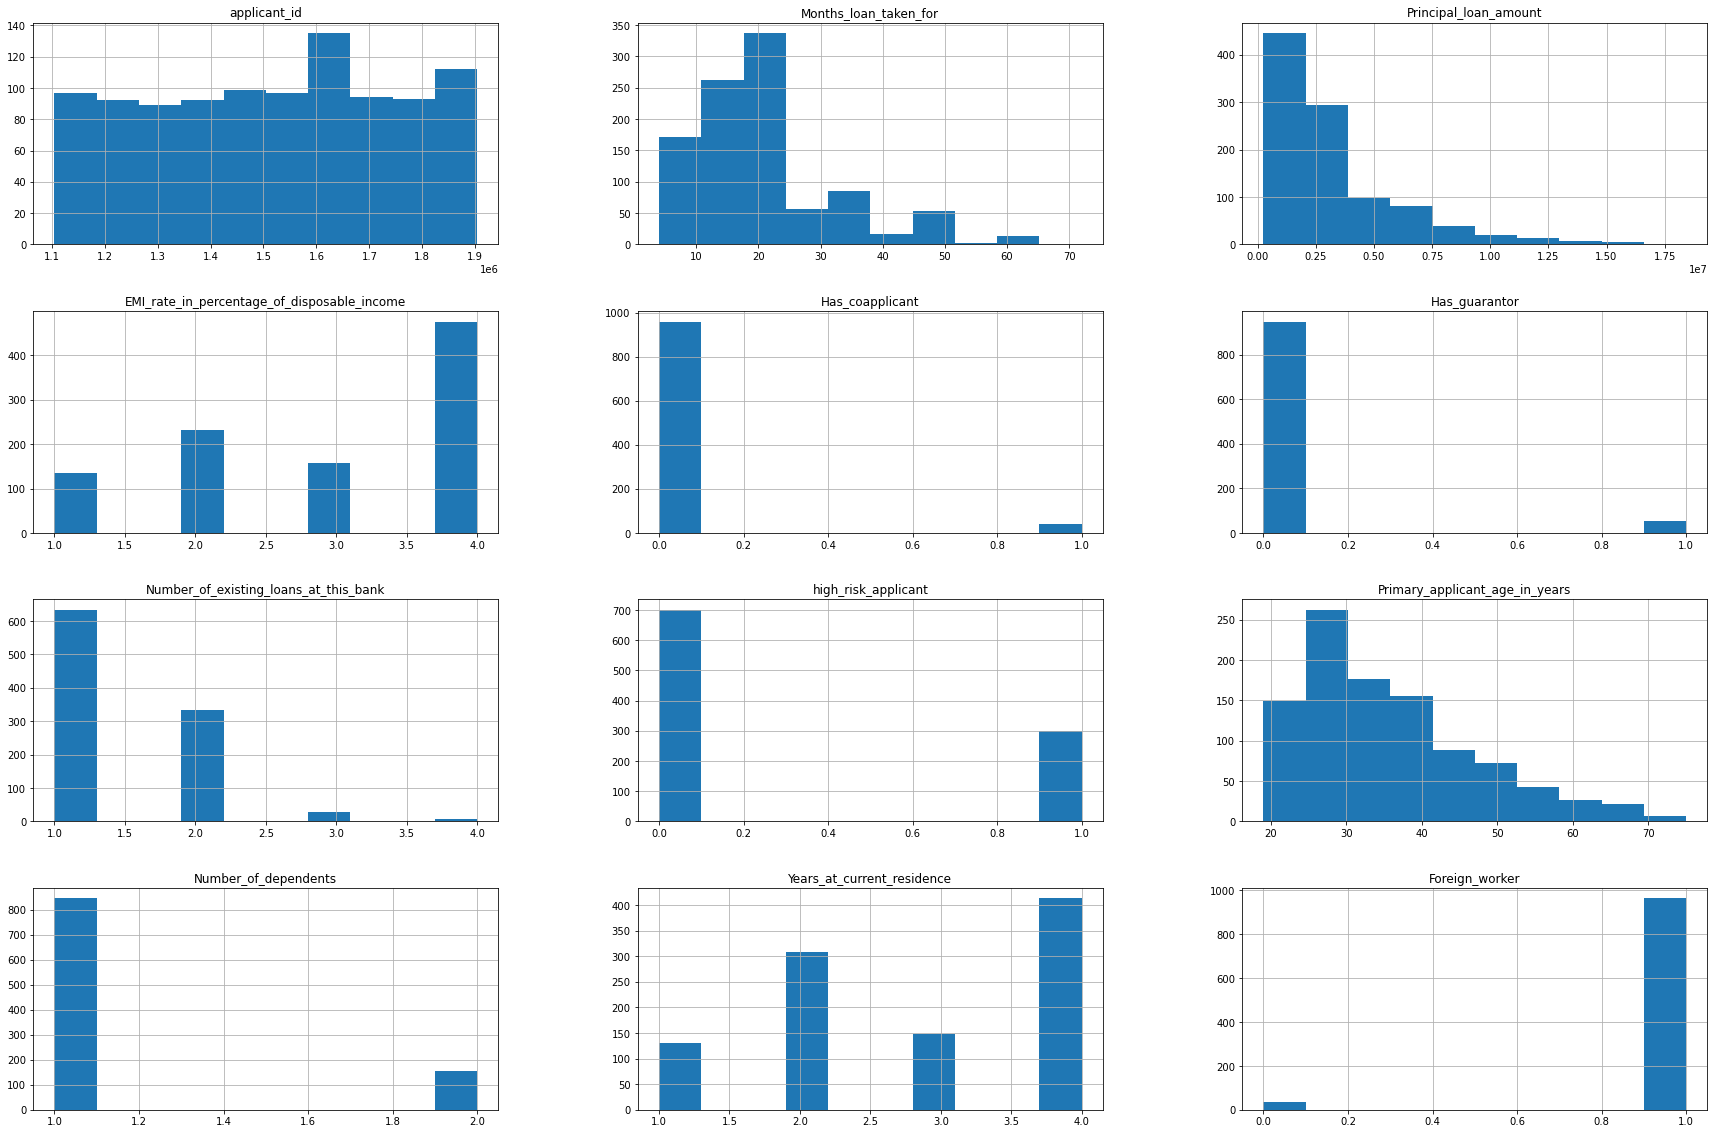

In [49]:
df1.hist(bins=10, figsize=(30,20))
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

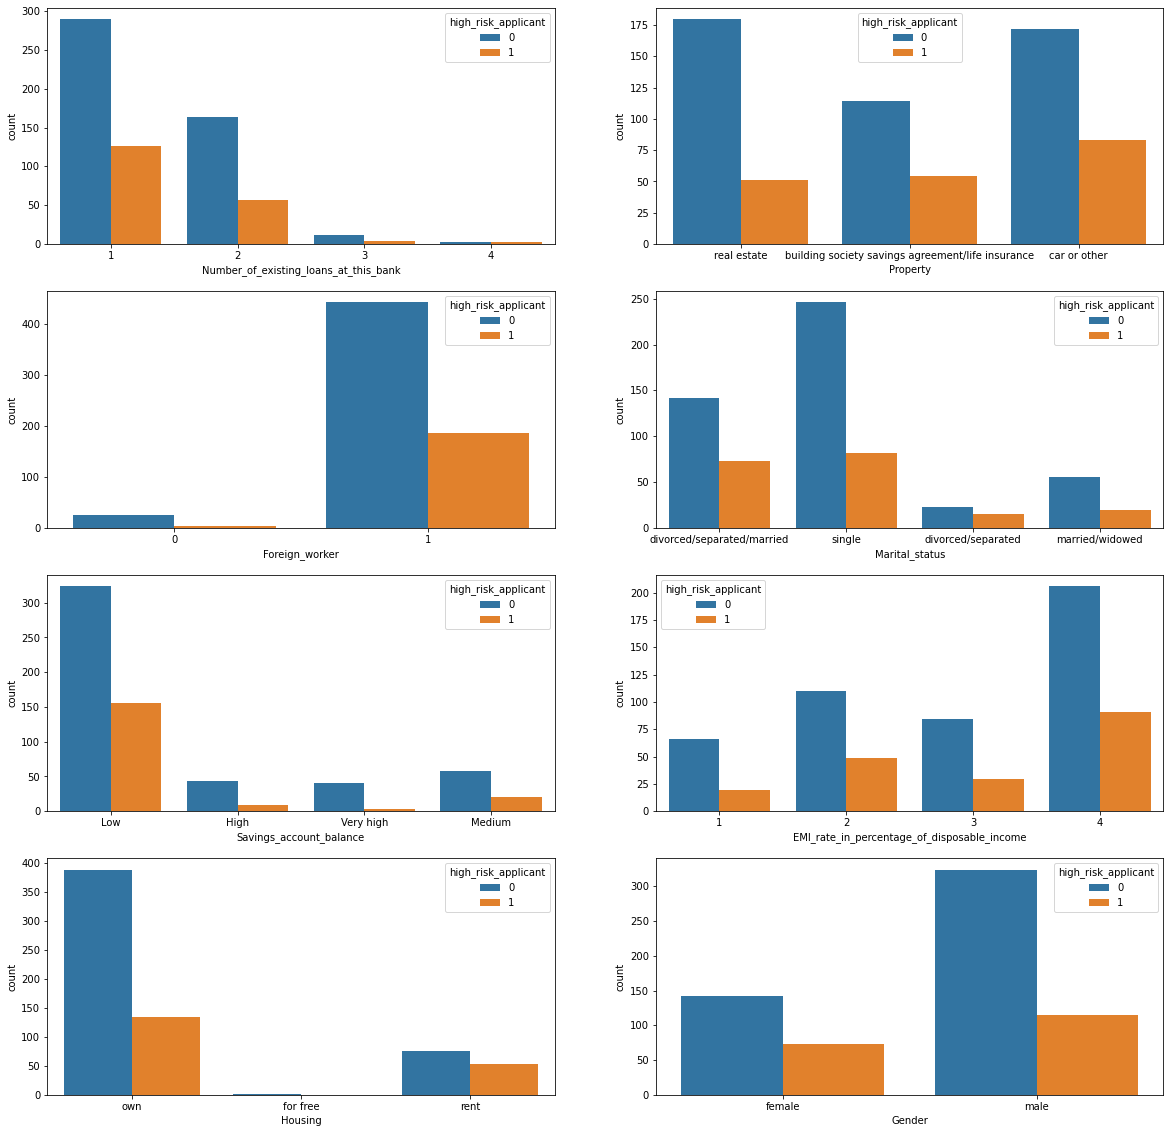

In [214]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (20, 20))
sns.countplot(df1['Number_of_existing_loans_at_this_bank'], hue = df1['high_risk_applicant'], ax = axes[0][0])
sns.countplot(df1['Property'], hue = df1['high_risk_applicant'], ax = axes[0][1])
sns.countplot(df1['Foreign_worker'], hue =df1['high_risk_applicant'], ax = axes[1][0])
sns.countplot(df1['Marital_status'], hue = df1['high_risk_applicant'], ax = axes[1][1])
sns.countplot(df1['Savings_account_balance'], hue = df1['high_risk_applicant'], ax = axes[2][0])
sns.countplot(df1['EMI_rate_in_percentage_of_disposable_income'], hue = df1['high_risk_applicant'], ax = axes[2][1])
sns.countplot(df1['Housing'], hue = df1['high_risk_applicant'], ax = axes[3][0])
sns.countplot(df1['Gender'], hue =df1['high_risk_applicant'], ax = axes[3][1])

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

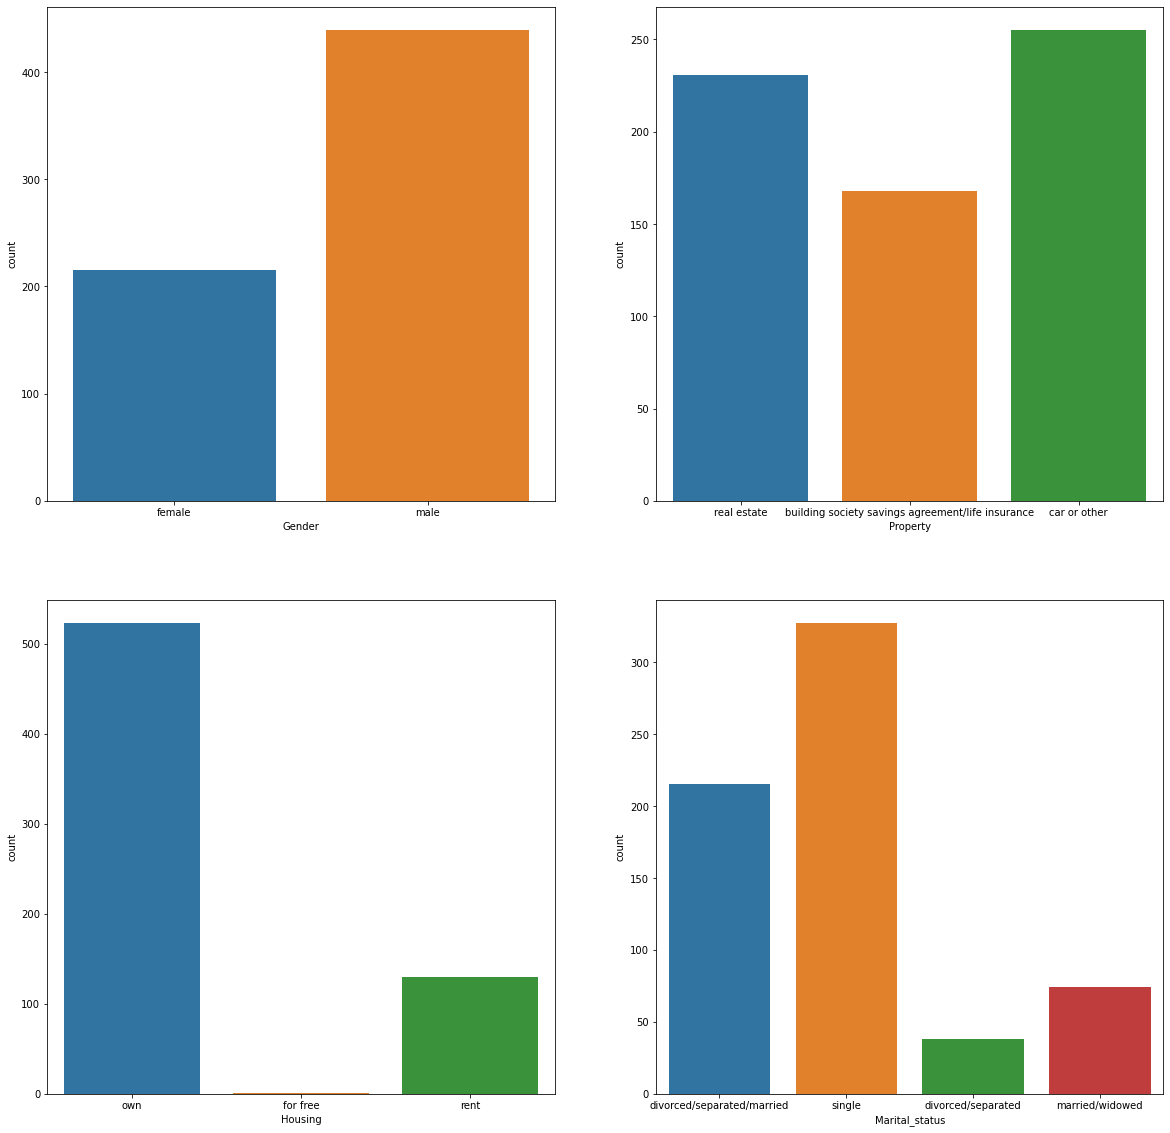

In [239]:
# First we can do the count plots
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (20, 20))
sns.countplot(df1['Gender'], ax = axes[0][0])
sns.countplot(df1['Property'], ax = axes[0][1])
sns.countplot(df1['Housing'], ax = axes[1][0])
sns.countplot(df1['Marital_status'], ax = axes[1][1])

<AxesSubplot:xlabel='Foreign_worker', ylabel='count'>

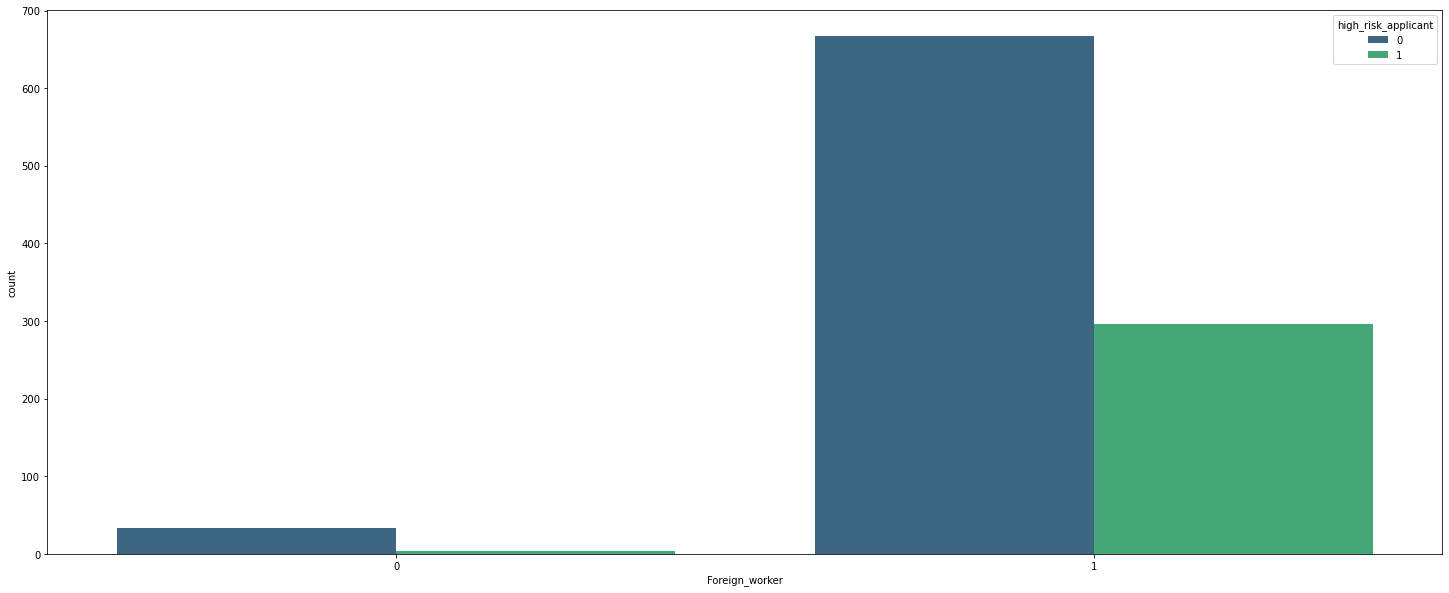

In [20]:
plt.figure(figsize=(25,10))
sns.countplot(x=df1["Foreign_worker"],hue=df1["high_risk_applicant"],palette="viridis")

### Majority applicants are foreign workers also falls under high risk category.

<AxesSubplot:xlabel='Loan_history', ylabel='count'>

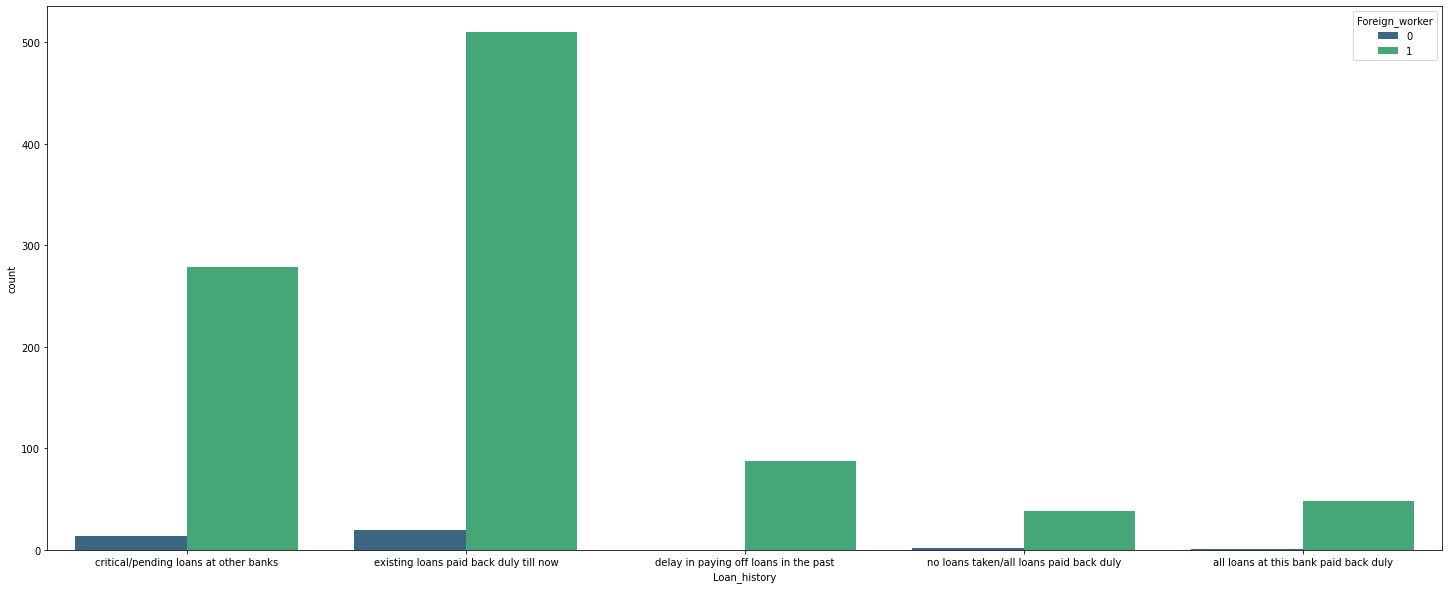

In [19]:
plt.figure(figsize=(25,10))
sns.countplot(x=df1["Loan_history"],hue=df1["Foreign_worker"],palette="viridis")

In [37]:
data.value_counts('Marital_status') 

Marital_status
single                        548
divorced/separated/married    310
married/widowed                92
divorced/separated             50
dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

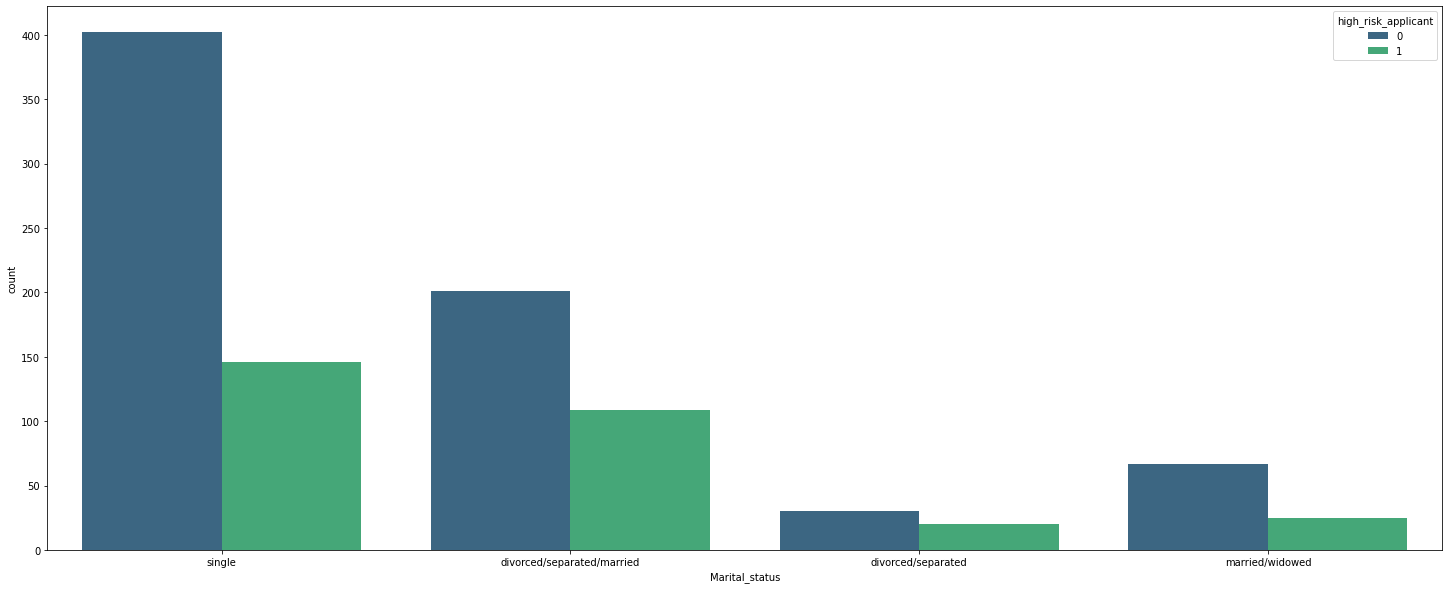

In [22]:
plt.figure(figsize=(25,10))
sns.countplot(x=data["Marital_status"],hue=data["high_risk_applicant"],palette="viridis")

<AxesSubplot:xlabel='Months_loan_taken_for', ylabel='count'>

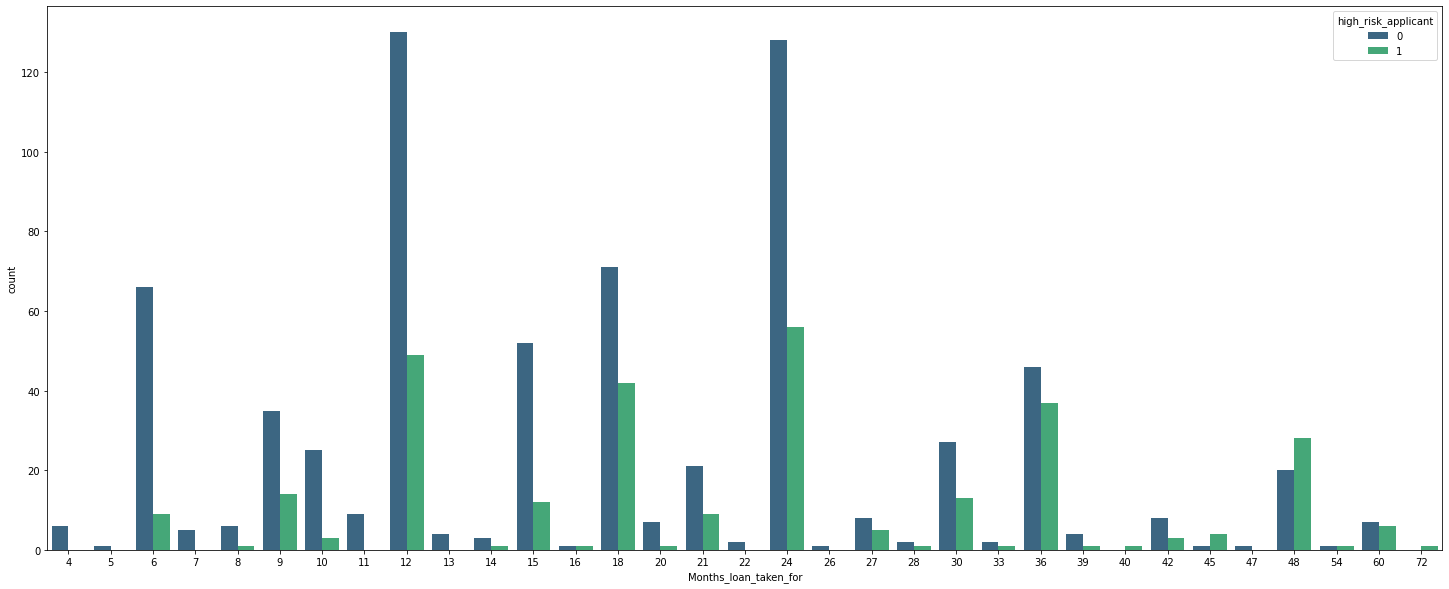

In [21]:
plt.figure(figsize=(25,10))
sns.countplot(x=data["Months_loan_taken_for"],hue=data["high_risk_applicant"],palette="viridis")

<AxesSubplot:>

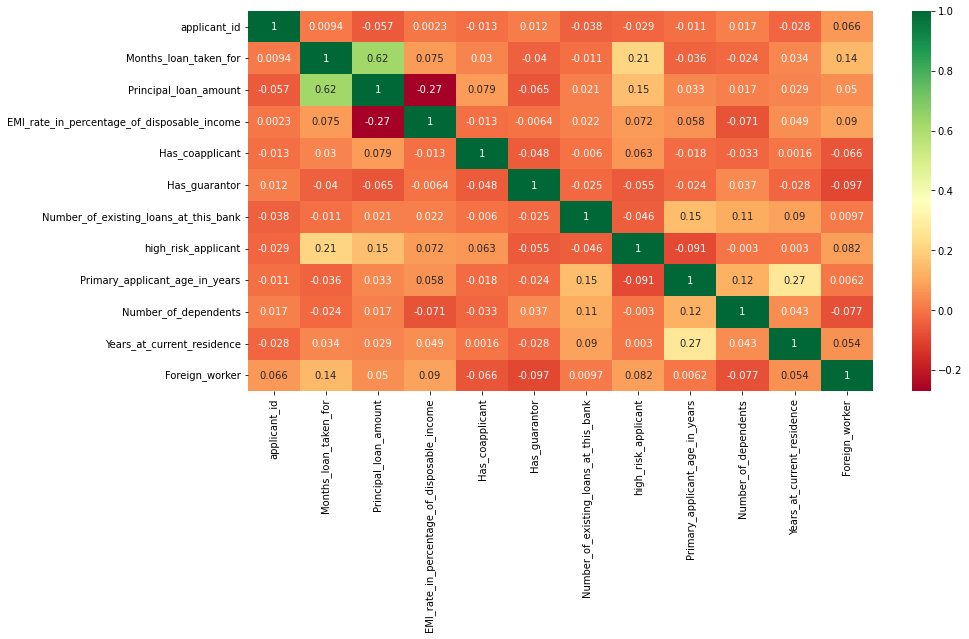

In [52]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn')

### From the heat map, we can see only the principal amount and months of loan taken is correlated. No more high correlated variables.

# Task 2

## Model building

In [144]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [167]:
# copying the original dataset into X
X=df1
# droping building_id and dependent variable damage_grade
# independant variables
X=X.drop(["high_risk_applicant","applicant_id","loan_application_id"],axis=1)
# dependent variable
y=df1["high_risk_applicant"]

In [169]:
# dependent variable
y=df1["high_risk_applicant"]
# label encoding the categorical variables
label_encoding_columns=['Employment_status', 'Purpose', 'Property',
       'Loan_history', 'Savings_account_balance',
       'Housing', 'Marital_status', 'Gender', 'Has_been_employed_for_at_least']
# label encoding categorical columns in train dataset 
for i in label_encoding_columns:
    X[i]=X[i].astype("category")
    X[i]=X[i].cat.codes
# label encoding categorical columns in test dataset
for j in label_encoding_columns:
    df1[j]=df1[j].astype("category")
    df1[j]=df1[j].cat.codes

In [170]:
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

# Decision Tree Classifier

In [173]:
dt = DecisionTreeClassifier(random_state=0)

In [174]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [175]:
prediction = dt.predict(x_test)

In [176]:
cm = confusion_matrix(y_test, prediction)
cm

array([[75, 25],
       [17, 14]], dtype=int64)

In [177]:
accuracy_score(y_test, prediction)

0.6793893129770993

In [178]:
f1_score(y_test,prediction, average="micro")

0.6793893129770993

In [179]:
print("classification report for decision tree :\n\n",classification_report(y_test, prediction))

classification report for decision tree :

               precision    recall  f1-score   support

           0       0.82      0.75      0.78       100
           1       0.36      0.45      0.40        31

    accuracy                           0.68       131
   macro avg       0.59      0.60      0.59       131
weighted avg       0.71      0.68      0.69       131



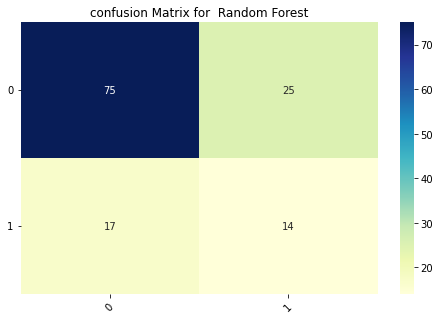

In [180]:
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

# Random Forest Classifier

In [181]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 18).fit(x_train, y_train)

In [ ]:
prediction = clf.predict(x_test)

In [183]:
cm = confusion_matrix(y_test, prediction)
cm

array([[93,  7],
       [22,  9]], dtype=int64)

In [184]:
accuracy_score(y_test, prediction)

0.7786259541984732

In [185]:
f1_score(y_test,prediction, average="micro")

0.7786259541984732

In [186]:
print("classification report for Random Forest :\n\n",classification_report(y_test, prediction))

classification report for Random Forest :

               precision    recall  f1-score   support

           0       0.81      0.93      0.87       100
           1       0.56      0.29      0.38        31

    accuracy                           0.78       131
   macro avg       0.69      0.61      0.62       131
weighted avg       0.75      0.78      0.75       131



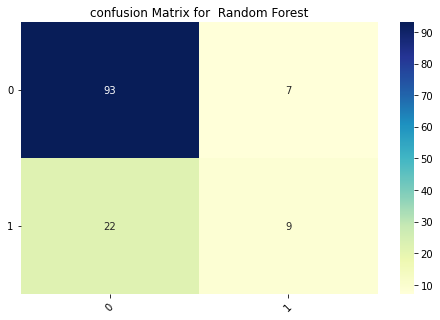

In [187]:
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

#### Here Random Forest Classifier algorithm able to achieve the F1-score of 0.78 (78%) which is better than decision tree model (68%) 